### Part I: Project Background
#### Main Objective: Increase the effectiveness of the bank's telemarketing campaign.
This project enables the bank to develop a granular understanding of its customer base, predict customer's response to its telemarketing campaign and establish a target customer profile for future marketing campaigns.

By analyzing customer features, the bank will be able to predict customer saving behaviors and identify which type of customers is more likely to make term deposits.  The bank can focus its marketing efforts on those customers. This will allow the bank to secure deposits more effectively and increase customer satisfaction by reducing undesirable advertising for certain customers.

<b>Data Profile</b><br/>
1 - Age (numeric)<br/>
2 - Job (Categorical) - Type of job (Admin, Unknown, Unemployed, Management, Housemaid, Entrepreneur, Student, Blue-collar, Self-employed, Retired, Technician, Services)<br/>
3 - Marital - Marital Status (Categorical: Married, Divorced, Single. Note: Widowed falls under the divorced category)<br/>
4 - Education - Categorical (Unknown, Primary, Secondary, Tertiary)<br/>
5 - Default - Binary(Has credit in default? Yes/No)<br/>
6 - Balance - Numeric (Average yearly balance, in euros)<br/>
7 - Housing - Binary (Have housing loan? Yes/No)<br>
8 - Loan - Binary(Have a personal loan? Yes/No)<br/>

Related with the last contact of current campaign:<br/>
9 - Contact - Categorical (Contact communication type: Unknown, telephone, cellular)<br/>
10 - Day - Numeric (Last contact day of the month)<br/>
11 - Month - Categorical (Last contact month of the year: "Jan", "Feb", "Mar", ... , "Nov", "Dec")<br/>
12 - Duration - Numeric (Last contact duration, in seconds)<br/>
<br/>
Other attributes:<br/>
13 - Campaign - Numeric (Number of contacts performed during this campaign and for this client, also includes last contact)<br/>
14 - pdays - Numeric (Number of days that have passed after the client was last contacted from a previous campaign; -1 means the client was not previously contacted.)<br/>
15 - Previous - Numeric (Number of contacts performed before this campaign and for this client.)<br/> 
16 - poutcome - Categorical (Outcome of the previous marketing campaign: Unknown, Other, Failure, Success)<br/>

Output variable - Desired target

### Part II: Data Cleaning
This dataset is about the direct phone marketing campaigns, whose objective to promote term deposits among existing customers, by a Portuguese bank from May 2008 to November 2010.  This dataset is publicly available in the UCI Machine Learning Repository which can be found at <link>http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.</link>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
linkname = 'bank-full.csv'
dataset = pd.read_csv(linkname, sep=';')
import seaborn as sns

There are 41,188 observations in this dataset.  Each represents an existing customer that the bank reached by phone.
For each observation, the dataset records <b>16 input variables and a single binary output variable</b> that stand for both qualitative and quantitative attributes of the customer.  See the data profile above for more information about the data.

In [2]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Deal with missing data
There are no missing values in this dataset, however, there are values like "unknown", "others", which are just as bad as a missing value.  These ambiguous values are removed from the dataset.

In [4]:
condition = dataset.poutcome == 'other'
dataset2 = dataset.drop(dataset[condition].index, axis=0, inplace=False)

In [5]:
dataset2[['job', 'education']] = dataset2[['job', 'education']].replace(['unknown'], 'other')

### Drop outliers in the column 'balance'
The outliers in the column 'balance' are removed to capture the general trend of the dataset.  An outlier is defined as a value which is more than three standard deviations from the mean.  This resulted in 2556 rows of data being removed.

In [6]:
from scipy.stats import zscore
dataset2[['balance']].mean()
dataset2['balance_outliers'] = dataset2['balance']
dataset2['balance_outliers'] = zscore(dataset2['balance_outliers'])
condition2 = (dataset2['balance_outliers'] > 3) | (dataset2['balance_outliers'] < -3)
dataset3 = dataset2.drop(dataset2[condition2].index, axis=0, inplace=False)

In [7]:
dataset4 = dataset3.drop('balance_outliers', axis=1)

### Transforming data
The following changes were made to allow for easier analysis.
<ol>
    1. Change the column 'y' to 'response'<br/>
    2. Drop the column 'contact', which is useless.<br/>
    3. Change the unit of 'duration' from seconds to minutes.<br/>
    4. Change the 'month' from words to numbers for easier analysis.<br/>
</ol>

In [8]:
# Number 1.
dataset4.rename(index=str, columns={'y':'response'}, inplace=True)
def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset4[new_column].value_counts()
convert(dataset4, 'response_binary', 'response')

0    37785
1     4870
Name: response_binary, dtype: int64

In [9]:
# Number 2.
dataset5 = dataset4.drop('contact', axis=1)

In [10]:
# Number 3.
dataset5['duration'] = dataset5['duration'].apply(lambda n: n/60).round(2)

In [11]:
# Number 4.
lst = [dataset5]
for column in lst:
    column.loc[column['month'] == 'jan', 'month_int'] = 1
    column.loc[column['month'] == 'feb', 'month_int'] = 2
    column.loc[column['month'] == 'mar', 'month_int'] = 3
    column.loc[column['month'] == 'apr', 'month_int'] = 4
    column.loc[column['month'] == 'may', 'month_int'] = 5
    column.loc[column['month'] == 'jun', 'month_int'] = 6
    column.loc[column['month'] == 'jul', 'month_int'] = 7
    column.loc[column['month'] == 'aug', 'month_int'] = 8
    column.loc[column['month'] == 'sep', 'month_int'] = 9
    column.loc[column['month'] == 'oct', 'month_int'] = 10
    column.loc[column['month'] == 'nov', 'month_int'] = 11
    column.loc[column['month'] == 'dec', 'month_int'] = 12

### Filtering

In [12]:
# Drop the rows that have 'duration' less than 5 seconds.
condition2 = (dataset5['duration'] < 5 / 60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis=0, inplace=False)

In [13]:
# Drop customer values with 'other' education.
condition3 = (dataset6['education'] == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis=0, inplace=False)

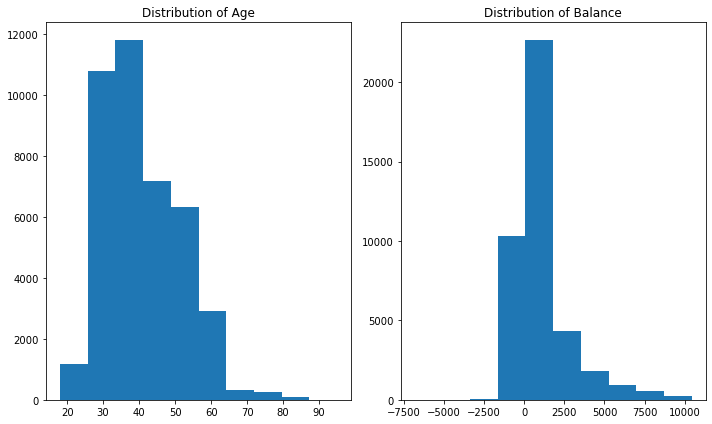

In [14]:
dist_age_balance = plt.figure(figsize=(10, 6))
ra1 = dist_age_balance.add_subplot(1, 2, 1)
ra2 = dist_age_balance.add_subplot(1, 2, 2)
ra1.hist(dataset7['age'])
ra1.set_title('Distribution of Age')
ra2.hist(dataset7['balance'])
ra2.set_title('Distribution of Balance')
plt.tight_layout()
plt.show()

<b>The distribution age</b>: There is an extensive age range range, from 18 to 95 years old.  The majority of customers called was in the age range of 30s to 40s (33 to 48 years old fall within the 25th and 75th percentile).  The distribution of customer age is fairly normal with a small standard deviation.

<b>The distribution of balance</b>:  After dropping the outliers in balance, the range of balance is still huge (min = -6847, max = 10443, range = 17290).  The distribution of balance has a huge standard deviation relative to the mean, suggesting huge variabilities in customer balance levels.

### Is there a relationship between 'age' and 'balance' ?

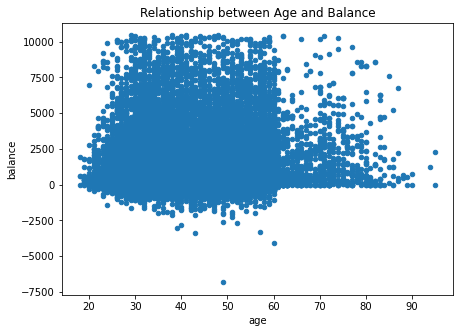

In [15]:
scatter_age_balance = dataset7.plot.scatter('age', 'balance', figsize=(7, 5))
plt.title('Relationship between Age and Balance')
plt.show()

Based on this plot, there is no clear relationship between a client's age and balance.  Clients over the age of 60 have a lower balance, due to that most people over the age of 60 are retired and have no steady income.

### Distribution of 'duration' and 'campaign'

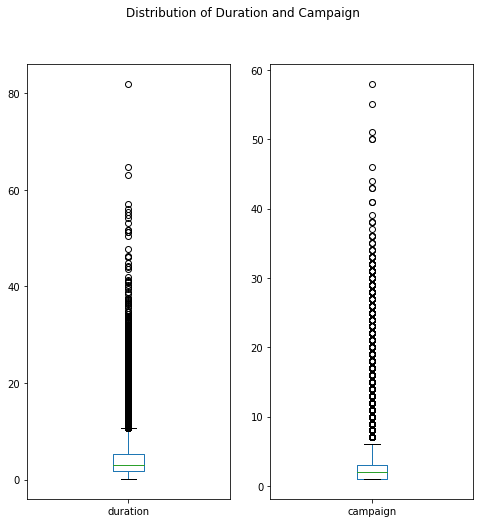

In [16]:
dist_dur_camp = dataset7[['duration', 'campaign']].plot(kind='box', figsize=(8, 8), subplots=True, layout=(1,2), sharex=False, sharey = False, title='Distribution of Duration and Campaign')
plt.show()

<b>Distrubution of Duration</b>:  The duration of contact has a median of 3 minutes, with an IQR range of 1.73 minutes to 5.3 minutes.  This indicates that most of the calls are short; there is a large number of outliers ranging from 10 to 40 minutes, which is worthy of further investigation.

<b>Distribution of Campaign</b>:  Most of the clients have been contacted at least twice, with a majority having been contacted between 1 and 3 times.  The high number of outliers in the range of 40-60 times is not normal.

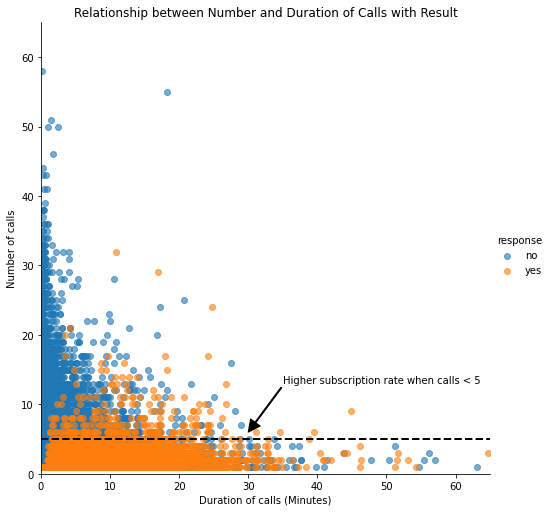

In [17]:
dur_camp = sns.lmplot(x='duration', y='campaign', data=dataset7, hue='response', fit_reg=False, scatter_kws={'alpha':0.6}, height=7)
plt.axis([0,65,0,65])
plt.ylabel('Number of calls')
plt.xlabel('Duration of calls (Minutes)')
plt.title('Relationship between Number and Duration of Calls with Result')
plt.axhline(y=5, linewidth=2, color='k', linestyle='--')
plt.annotate('Higher subscription rate when calls < 5', xytext = (35, 13), arrowprops=dict(color='k', width=1), xy=(30,6))
plt.show()

From the plot, the "yes" and "no" clients form two separate clusters.  Compared to the "no" clients, the "yes" clients were contacted fewer times and had a longer call duration.  Clients were likely to reject the term deposit after 5 campaign calls, unless the duration of the calls were high.  A majority of the "yes" clients were approached less than 10 times.

This suggests that the bank should resist calling a client more than 5 times, which can be disturbing to the customer.

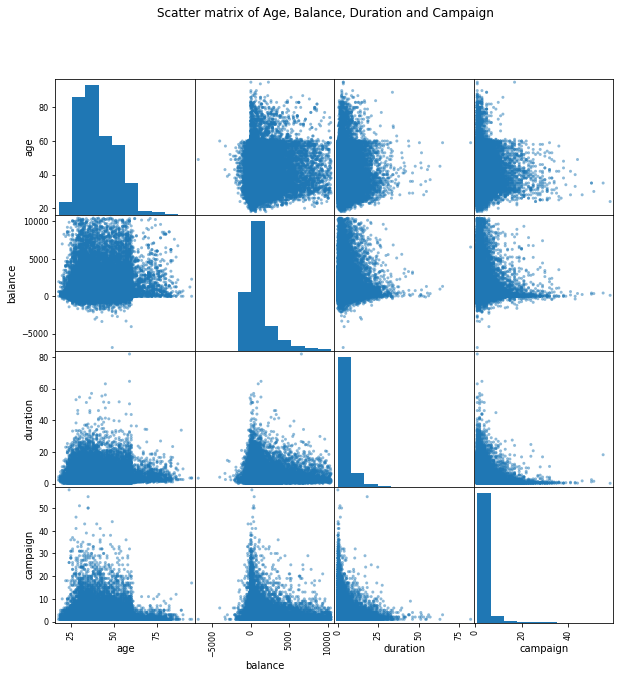

In [18]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset7[['age', 'balance', 'duration', 'campaign']], figsize=(10,10))
plt.suptitle('Scatter matrix of Age, Balance, Duration and Campaign')
plt.show()

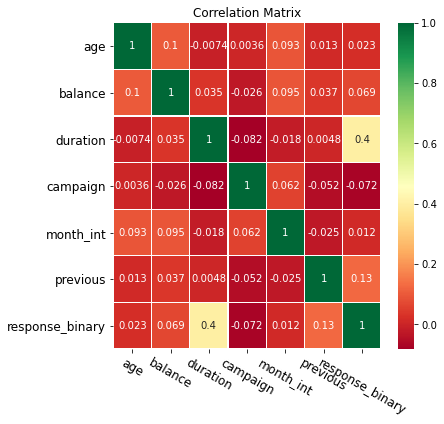

In [19]:
corr_data = dataset7[['age', 'balance', 'duration', 'campaign', 'month_int', 'previous', 'response_binary']]
corr = corr_data.corr()
cor_plot = sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.xticks(fontsize=12, rotation=-30)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix')
plt.show()

The scatter matrix does not reveal any relationships among age, balance, duration, and campaign.

'Campaign outcome' has a strong correlation with 'duration', a moderate correlation with 'previous contacts', and a mild correlation between 'balance', 'month of contact', and 'number of campaign'.  These will be evaluated later.

In [20]:
lst = [dataset7]
for column in lst:
    column.loc[column['age'] < 30, 'age_group'] = 20
    column.loc[(column['age'] >= 30) & (column['age'] <= 39), 'age_group'] = 30
    column.loc[(column['age'] >= 40) & (column['age'] <= 49), 'age_group'] = 40
    column.loc[(column['age'] >= 50) & (column['age'] <= 59), 'age_group'] = 50
    column.loc[column['age'] >= 60, 'age_group'] = 60

In [21]:
count_age_response_pct = pd.crosstab(dataset7['response'], dataset7['age_group']).apply(lambda x: x / x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

In [22]:
age = pd.DataFrame(dataset7['age_group'].value_counts())
age['% Contacted'] = age['age_group'] * 100 / age['age_group'].sum()
age['% Subscribed'] = count_age_response_pct['yes']
age.drop('age_group', axis=1, inplace=True)
age['age'] = [30, 40, 50, 20, 60]
age.sort_values('age', ascending=True)

,% Contacted,% Subscribed,age
20.0,11.618227,16.986301,20
30.0,40.562180,10.364602,30
40.0,25.778017,8.824088,40
50.0,18.398178,9.182859,50
60.0,3.643398,33.400538,60


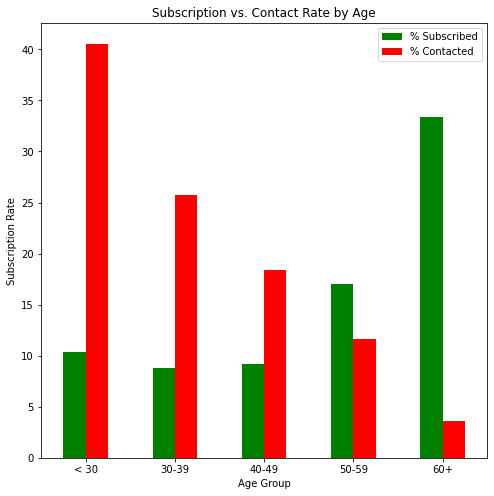

In [23]:
plot_age = age[['% Subscribed', '% Contacted']].plot(kind='bar', figsize=(8, 8), color=('green', 'red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('< 30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

<b>Insight: Target the youngest and the oldest.</b>
The green bars indicate the clients who are 60+ have the highest subscription rate.  Approximately 17% of the subscriptions came from clients aged 18 to 29.  More than half of the subscriptions were from the youngest and eldest of adults.  This leads to two conlcusions:
<li>
    <ol>The main investment objective of older people is saving for retirement.  Term deposits are the least risky type of investment for this age group.  Middle age people are going to go for the more riskier type of investment to generate more retirement income faster.</ol>
    <ol>The youngest group are most likely students, who have no idea how to invest their money or who do not have a lot of money to invest.  Term deposits give them liquidity and generate interest incomes that are higher than a regular savings account, which makes term deposits ideal for students.</ol>
</li>

The red bars show that the bank is currently focused on marketing to the middle-aged group, which have returned lower subscription rates.  Therefore, to make the marketing campaign more effective, it should focus on younger and older clients.

In [24]:
lst = [dataset7]
for column in lst:
    column.loc[column["balance"] <= 0, 'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [25]:
count_balance_response_pct = pd.crosstab(dataset7['response'], dataset7['balance_group']).apply(lambda x: x / x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [26]:
bal = pd.DataFrame(dataset7['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group'] * 100 / bal['balance_group'].sum()
bal['% Subscribed'] = count_balance_response_pct['yes']
bal.drop('balance_group', axis=1, inplace=True)
bal['bal'] = [1, 2, 0, 3]
bal.sort_values('bal', ascending=True)

,% Contacted,% Subscribed,bal
no balance,16.591171,6.921488,0
low balance,52.393428,10.734648,1
average balance,26.321589,14.762791,2
high balance,4.693813,14.919144,3


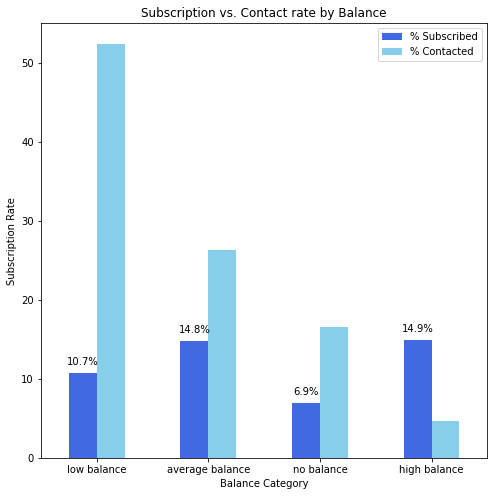

In [27]:
plot_balance = bal[['% Subscribed', '% Contacted']].plot(kind='bar', color=('royalblue', 'skyblue'), figsize=(8, 8))
plt.title('Subscription vs. Contact rate by Balance')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation='horizontal')
for rec, label in zip(plot_balance.patches, bal['% Subscribed'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width() / 2, rec.get_height() + 1, label + '%', ha = 'center', color='black')

<b>Insight: Target clients who have average or high balances</b>

The chart above indicates a positive correlation between the client's balance and the subscription rate.  Clients with average or high balance had a subscription rate of 15% each.  Unfortunately, more than 50% of the clients contacted had a low or no balance.  The bank should focus on only high-balance customers to gain more term deposits.

### Subscription rate by age and balance

In [28]:
age_balance_1 = pd.DataFrame(dataset7.groupby(['age_group', 'balance_group'])['response_binary'].sum())
age_balance_2 = pd.DataFrame(dataset7.groupby(['age_group', 'balance_group'])['response'].count())
age_balance_1['response'] = age_balance_2['response']
age_balance_1['response_rate'] = age_balance_1['response_binary'] / (age_balance_1['response'])
age_balance_1 = age_balance_1.drop(['response_binary', 'response'], axis=1)
age_balance_1 = age_balance_1.unstack()

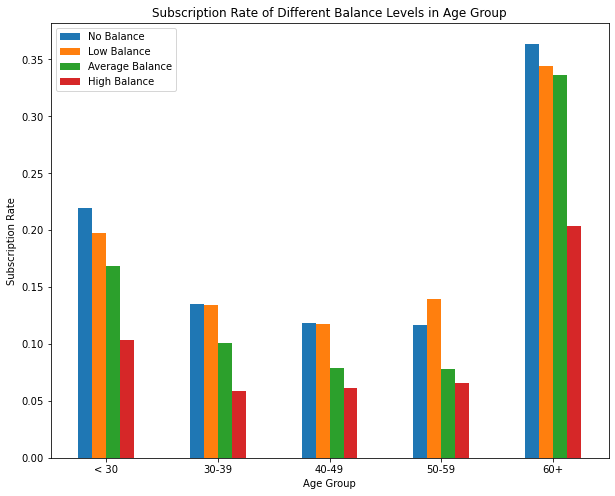

In [29]:
age_balance = age_balance_1.plot(kind='bar', figsize=(10, 8))
plt.xticks(np.arange(5), ('< 30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.legend(['No Balance', 'Low Balance', 'Average Balance', 'High Balance'], loc='best', ncol=1)
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('Subscription Rate of Different Balance Levels in Age Group')
plt.show()

<b>Insight:  Target older clients with high balances</b>

Age represents a person's stage in life.  Balance represents a person's financial strength.  By jointly investigating these two factors, we can see if there is a common trend across all of the age groups and to see which combination yields the highest probability of subscribing.

The graph tells the same story regarding the subscription rate for each age group with <b>people under the age of 30 and those 60+</b> are likely to subscribe.  Also, <b>the amount of each group's balance has an impact on the subscription rate</b>.

In summary, the bank needs to <b>prioritize its marketing to clients who are 60+ and have high balances</b> which has a subscription rate of 35%, followed by <b>young clients with positive balances</b> with a subscription rate of 15%.

### Subscripton by Job

In [30]:
count_job_pct = pd.crosstab(dataset7['response'], dataset7['job']).apply(lambda x: x / x.sum() * 100)
count_job_pct = count_job_pct.transpose()

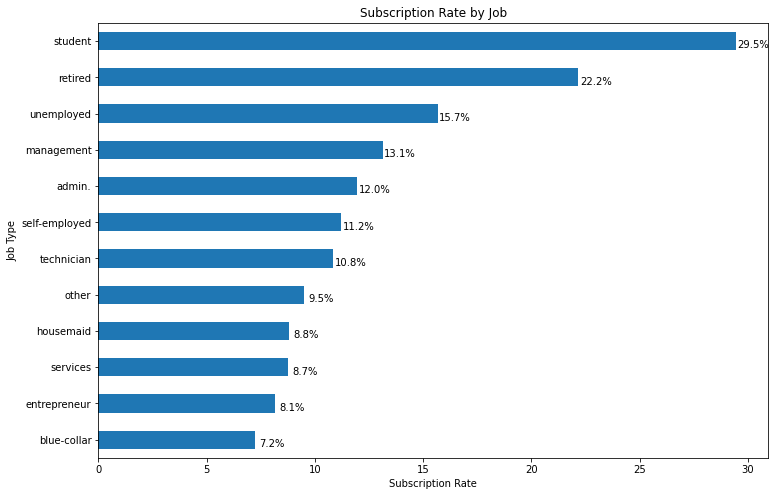

In [31]:
plot_job = count_job_pct['yes'].sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Type')
for rec, label in zip(plot_job.patches, count_job_pct['yes'].sort_values(ascending=True).round(1).astype(str)):
    plot_job.text(rec.get_width() + 0.8, rec.get_y() + rec.get_height() - 0.5, label+'%', ha='center', va='bottom')

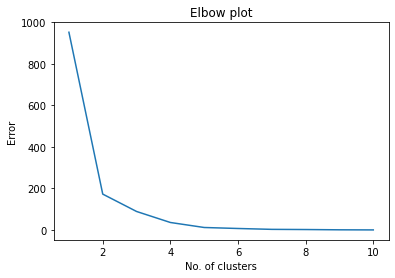

In [32]:
from sklearn.cluster import KMeans
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(count_job_pct)
    kmeans.fit(count_job_pct)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow plot')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.show()


In [38]:
kmean = KMeans(n_clusters=3).fit(count_job_pct)
print(kmean.labels_)

[0 2 2 2 0 2 1 0 2 1 0 0]


<b>Insight: Target students and retired clients</b>
Students and retired clients make up over 50% of the subscriptions, which is consistent with the findings of higher subscription rates among the older and younger.

### Subscription and contact rate by the month

In [33]:
count_month_pct = pd.crosstab(dataset7['response'], dataset7['month_int']).apply(lambda x: x / x.sum() * 100)
count_month_pct = count_month_pct.transpose()

In [34]:
month = pd.DataFrame(dataset7['month_int'].value_counts())
month['% Contacted'] = month['month_int'] * 100 / month['month_int'].sum()
month['% Subscribed'] = count_month_pct['yes']
month.drop('month_int', axis=1, inplace=True)
month['Month'] = [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
month = month.sort_values('Month', ascending=True)

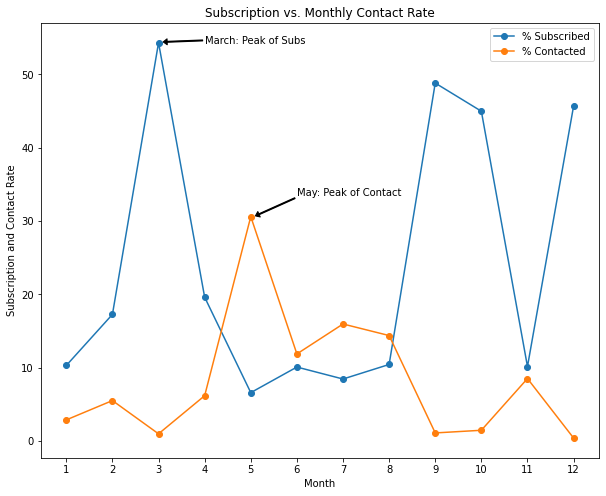

In [35]:
plot_month = month[['% Subscribed', '% Contacted']].plot(kind='line', figsize=(10, 8), marker='o')
plt.title('Subscription vs. Monthly Contact Rate')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
ticks = np.arange(1, 13, 1)
plt.xticks(ticks)
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of Contact', xy=(x+0.1, y+0.1), xytext=(x+1, y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
y = month['% Subscribed'].max()
x = month['% Subscribed'].idxmax()
plt.annotate('March: Peak of Subs', xy=(x+0.1, y+0.1), xytext=(x+1, y+1), arrowprops = dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
plt.show()

<b>Insight:  Fall or spring is the best time to start a new campaign.</b>

Some external factors can impact the subscription rate, such what time of year the client is contacted.  This is why the month attribute is analyzed here.  The twin line chart above shows the bank's contact rate per month and the client's response per month.  A way to evaluate the bank's plan is to see whether or not these two lines have a similar trend over the same time.

The bank <b>contacted the most clients between the months of May and August.</b>  The highest contact rate occurred in May (around 30%).  The contact rate was near 0 for the months of March, September, October, and December.

The subscription percentage tells a different story.  <b>The highest subscription rate occurred in March</b> with a rate of close to 50%.  The subscription rates in <b>September, October, and December are over 40%.</b>

This telling fact indicates that the timing of the bank's campaigns are misaligned.  These two values should match if the bank wants to have an effective marketing campaign.  When analyzing other external factors, the bank must be careful because of lack of relevant data.  The seasonal data must be evaluated further when more data is available.

In [36]:
dataset7.to_csv('bank_cleaned.csv')